#Renewable Energy Distribution Forecasting


The urgent need for renewable energy is underscored by the fact that the world faces less than six years to achieve global climate goals with the Earth's annual temperature having increased by over 1 degree Celsius since the Industrial Revolution(Shaftel, n.d.). The Paris Agreement is calling nations to work together in the fight against climate change, to limit global warming to 1.5 degrees Celsius above pre-industrial levels, and to be able to do this, greenhouse gas emissions, primarily those from non-renewable sources, must decline 43% by the year 2030. Fossil fuel-based energy sources, such as coal and natural gas, contribute significantly to carbon dioxide emissions, exacerbating global warming (Sustainable Development Goals, n.d.). The importance of utilizing energy from sources like solar and wind is growing, as evidenced by the remarkable 440 GW increase in worldwide renewable energy capacity in 2023 alone, according to recent studies. But because these resources are sporadic, integrating them strategically is necessary (Renewable Power on Course to Shatter More Records as Countries around the World Speed up Deployment - News, 2023)   . According to the International Energy Agency (IEA), forecasting of renewable energy, supported by cutting-edge technologies, has proven its effectiveness by sometimes attaining prediction accuracy levels of 90%. In 2019, the global share of renewables in primary energy.  And without further intervention, reaching the 35% by 2030 and 50% by 2040 may not be attainable.
Forecasting renewable energy has a variety of difficulties even though it is essential to the integration of sustainable sources into the electrical grid. Because of the unpredictability of renewable resources such as solar and wind, there is a big challenge because of weather and environmental variations (Sweeney et al, 2019). Since various sources are impacted by a wide range of interrelated variables, accurate prediction becomes more challenging. Uncertainty is further increased by the absence of historical data for developing technology and changing climatic trends. The requirement for high temporal and spatial resolutions to meet the real-time demands of energy systems adds to the complexity of forecasting. Moreover, the dynamic character of energy markets and policy environments adds another level of complexity since changes in incentives and regulations affect the economic viability of renewable projects.



**Research Questions**


1.  Can a year wherein energy from renewables have become greater than energy from fossil fuels be forecasted?
2.	What percentage of energy production share will renewables be by 2030?




##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

##Data Loading and Cleaning

###Loading Data

Load the dataset on the global data on sustainable energy as a pandas dataframe.

In [ ]:
data = pd.read_csv("global-data-on-sustainable-energy.csv")

Inspect the features included in the dataset

### Cleaning

In [ ]:
data.columns.values

array(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)',
       'Latitude', 'Longitude'], dtype=object)

Inspect the data within the dataset. You may inspect per country as well.

In [ ]:
data[data['Entity'].str.contains('Cambodia')]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
567,Cambodia,2000,16.600000,3.6,0.83,NaN,81.58,0.42,0.0,0.05,...,739.45550,7.91,1960.000000,NaN,9.993580,300.613679,95,181035.0,12.565679,104.990963
568,Cambodia,2001,14.624778,4.1,0.82,NaN,80.51,0.48,0.0,0.03,...,769.40970,7.51,2150.000000,NaN,8.148386,321.150224,95,181035.0,12.565679,104.990963
569,Cambodia,2002,18.187100,4.7,0.97,NaN,80.97,0.66,0.0,0.03,...,754.14470,7.05,2210.000038,NaN,6.578940,338.987477,95,181035.0,12.565679,104.990963
570,Cambodia,2003,19.300000,5.3,0.96,4630000.0,79.92,0.67,0.0,0.04,...,803.81635,6.69,2380.000114,NaN,8.505896,362.335482,95,181035.0,12.565679,104.990963
571,Cambodia,2004,25.298384,5.9,1.02,409150000.0,80.69,0.73,0.0,0.03,...,813.56445,6.23,2380.000114,NaN,10.340529,408.513639,95,181035.0,12.565679,104.990963
572,Cambodia,2005,20.500000,6.7,1.02,1250000.0,79.24,0.86,0.0,0.04,...,909.82135,5.73,2660.000086,NaN,13.250087,474.111192,95,181035.0,12.565679,104.990963
573,Cambodia,2006,32.407580,7.6,1.35,10300000.0,78.01,0.98,0.0,0.13,...,967.99585,5.31,2960.000038,NaN,10.771084,539.750329,95,181035.0,12.565679,104.990963
574,Cambodia,2007,35.967636,8.4,1.40,NaN,74.79,1.25,0.0,0.16,...,1116.15470,5.03,3660.000086,NaN,10.212574,631.525258,95,181035.0,12.565679,104.990963
575,Cambodia,2008,26.400000,9.4,1.47,65900000.0,74.13,1.23,0.0,0.16,...,1152.20100,4.76,4059.999943,NaN,6.691577,745.609127,95,181035.0,12.565679,104.990963
576,Cambodia,2009,43.112152,10.5,1.53,3840000.0,68.04,1.02,0.0,0.15,...,1399.93350,5.07,4750.000000,NaN,0.086697,738.054731,95,181035.0,12.565679,104.990963


The purpose of the current study is to forecast energy generation. With this in mind, columns such as "Electricity from fossil fuels", "Electricity from Nuclear", and "Electricity from renewables" are the only important features besides the entity and year.

Remove all the unnecessary features.

Cells containing NaN would mess with the analysis. Instead of deleting rows with NaN, fill cells that have NaN with a value the year before using forward fill. This is viable because electricity generation is not expected to change by a significantly large amount in a year.

Place a backward fill in the case of a NaN exists at the start

In [ ]:
# Removal of Unnecessary Columns and Rows with NaN
columns_to_remove = ['Access to electricity (% of population)',
                     'Access to clean fuels for cooking',
                     'Renewable-electricity-generating-capacity-per-capita',
                     'Financial flows to developing countries (US $)',
                     'Primary energy consumption per capita (kWh/person)',
                     'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                     'Value_co2_emissions_kt_by_country',
                     'Renewable energy share in the total final energy consumption (%)',
                     'Low-carbon electricity (% electricity)',
                     'gdp_growth',
                     'gdp_per_capita',
                     'Renewables (% equivalent primary energy)',
                     'Density\\n(P/Km2)',
                     'Land Area(Km2)',
                     'Latitude',
                     'Longitude'
                     ]
data_dropped = data.drop(columns = columns_to_remove).fillna(method='ffill').fillna(method='bfill')


Inspect data before proceeding

In [ ]:
data_dropped

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
0,Afghanistan,2000,0.16,0.0,0.31
1,Afghanistan,2001,0.09,0.0,0.50
2,Afghanistan,2002,0.13,0.0,0.56
3,Afghanistan,2003,0.31,0.0,0.63
4,Afghanistan,2004,0.33,0.0,0.56
...,...,...,...,...,...
3644,Zimbabwe,2016,3.50,0.0,3.32
3645,Zimbabwe,2017,3.05,0.0,4.30
3646,Zimbabwe,2018,3.73,0.0,5.46
3647,Zimbabwe,2019,3.66,0.0,4.58


If a country exists with incomplete data (i.e. does not have all 21 years), remove from the dataset

In [ ]:
# Removal of Countries with Incomplete Years
country_years = data_dropped['Entity'].value_counts()
complete_country = country_years[country_years >= 20].index
complete_data = data_dropped[data_dropped['Entity'].isin(complete_country)]
complete_data

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
0,Afghanistan,2000,0.16,0.0,0.31
1,Afghanistan,2001,0.09,0.0,0.50
2,Afghanistan,2002,0.13,0.0,0.56
3,Afghanistan,2003,0.31,0.0,0.63
4,Afghanistan,2004,0.33,0.0,0.56
...,...,...,...,...,...
3644,Zimbabwe,2016,3.50,0.0,3.32
3645,Zimbabwe,2017,3.05,0.0,4.30
3646,Zimbabwe,2018,3.73,0.0,5.46
3647,Zimbabwe,2019,3.66,0.0,4.58


### Mapping

The current study is delimited to Asia, Sea, and then the Philippines. Therefore mapping the data by continent is necessary.

Utilize a different dataset for mapping every country to a continent. This dataset is available at https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv

In [ ]:
# Continent Mapping
# https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv
country_map = pd.read_csv("Countries-Continents.csv")
continent = []
for each in complete_data['Entity']:
    check_match = country_map[country_map['Country'] == each]
    if check_match.empty:
        continent.append(None)
    else:
        continent.append(check_match['Continent'].iloc[0])
complete_data['Continent'] = continent
mapped_data = complete_data
mapped_data

<ipython-input-12-c0404daf1337>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data['Continent'] = continent


,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Continent
0,Afghanistan,2000,0.16,0.0,0.31,Asia
1,Afghanistan,2001,0.09,0.0,0.50,Asia
2,Afghanistan,2002,0.13,0.0,0.56,Asia
3,Afghanistan,2003,0.31,0.0,0.63,Asia
4,Afghanistan,2004,0.33,0.0,0.56,Asia
...,...,...,...,...,...,...
3644,Zimbabwe,2016,3.50,0.0,3.32,Africa
3645,Zimbabwe,2017,3.05,0.0,4.30,Africa
3646,Zimbabwe,2018,3.73,0.0,5.46,Africa
3647,Zimbabwe,2019,3.66,0.0,4.58,Africa


### Subsets from Data Isolation

Isolate data for countries in asia only.

In [ ]:
# Isolate Asian Country Data
asia_data = mapped_data[mapped_data['Continent'] == 'Asia'].reset_index(drop = True)
asia_data

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Continent
0,Afghanistan,2000,0.16,0.0,0.31,Asia
1,Afghanistan,2001,0.09,0.0,0.50,Asia
2,Afghanistan,2002,0.13,0.0,0.56,Asia
3,Afghanistan,2003,0.31,0.0,0.63,Asia
4,Afghanistan,2004,0.33,0.0,0.56,Asia
...,...,...,...,...,...,...
709,Yemen,2016,4.36,0.0,0.16,Asia
710,Yemen,2017,3.63,0.0,0.19,Asia
711,Yemen,2018,2.82,0.0,0.48,Asia
712,Yemen,2019,2.93,0.0,0.48,Asia


Create a sub dataset that comprises of data within south-east asia only.

In [ ]:
# Isolate Southeast Asian Country Data
sea_countries = ['Brunei','Myanmar','Cambodia','Timor-Leste','Indonesia','Laos','Malaysia','Philippines','Singapore','Thailand','Vietnam']
sea_data = asia_data[asia_data['Entity'].isin(sea_countries)].reset_index(drop = True)
sea_data

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Continent
0,Cambodia,2000,0.42,0.0,0.05,Asia
1,Cambodia,2001,0.48,0.0,0.03,Asia
2,Cambodia,2002,0.66,0.0,0.03,Asia
3,Cambodia,2003,0.67,0.0,0.04,Asia
4,Cambodia,2004,0.73,0.0,0.03,Asia
...,...,...,...,...,...,...
121,Thailand,2016,161.79,0.0,15.97,Asia
122,Thailand,2017,161.88,0.0,19.92,Asia
123,Thailand,2018,156.26,0.0,25.84,Asia
124,Thailand,2019,162.59,0.0,28.02,Asia


Create another sub-dataset consisting of data from the Philippines only

In [ ]:
# Isolate Philippine Data
ph_data = sea_data[sea_data['Entity'] == 'Philippines'].reset_index(drop = True)
ph_data

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Continent
0,Philippines,2000,24.29,0.0,19.37,Asia
1,Philippines,2001,27.72,0.0,17.50,Asia
2,Philippines,2002,29.29,0.0,17.22,Asia
3,Philippines,2003,33.03,0.0,17.64,Asia
4,Philippines,2004,34.83,0.0,18.82,Asia
5,Philippines,2005,35.94,0.0,18.25,Asia
6,Philippines,2006,34.12,0.0,20.39,Asia
7,Philippines,2007,38.29,0.0,18.80,Asia
8,Philippines,2008,37.75,0.0,20.56,Asia
9,Philippines,2009,39.10,0.0,20.26,Asia


## Engineering Data Analysis

###Measures of Central Tendency

Make use of the measures of central tendency as initial analysis for the data

In [ ]:
asia_data.describe()

,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
count,714.000000,714.000000,714.000000,714.000000
mean,2010.000000,184.497605,10.641513,43.251527
std,6.059546,608.426792,44.281177,191.535320
min,2000.000000,0.000000,0.000000,0.000000
25%,2005.000000,4.785000,0.000000,0.030000
50%,2010.000000,34.405000,0.000000,2.195000
75%,2015.000000,86.447500,0.000000,14.275000
max,2020.000000,5184.130000,366.200000,2184.940000


In [ ]:
sea_data.describe()

,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
count,126.000000,126.000000,126.000000,126.000000
mean,2010.000000,82.132619,7.435000,13.172698
std,6.079474,61.994234,16.691534,12.345782
min,2000.000000,0.420000,0.000000,0.000000
25%,2005.000000,35.655000,0.000000,0.792500
50%,2010.000000,75.415000,0.000000,9.710000
75%,2015.000000,128.032500,0.000000,21.045000
max,2020.000000,247.390000,44.610000,52.910000


In [ ]:
ph_data.describe()

,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
count,21.000000,21.000000,21.0,21.000000
mean,2010.000000,49.181429,0.0,20.262381
std,6.204837,18.140448,0.0,2.011303
min,2000.000000,24.290000,0.0,17.220000
25%,2005.000000,34.830000,0.0,18.800000
50%,2010.000000,46.550000,0.0,20.180000
75%,2015.000000,60.820000,0.0,21.590000
max,2020.000000,83.300000,0.0,23.730000


However, it is evident that the measures of central tendency would not provide any significant conclusions due to the non-stationarity of the data (i.e. energy generation is expected to increase every year).

### Grouping Data

Since the groups of data to be forecasted is Asia, Sea and then the Philippines, subsets of the data must be made through the groupby function. Once grouped, the data is summed as the total electricity is of concern in this study.

In [ ]:
# Asia Group by Year
data_years = np.array(list(range(2000, 2021))).reshape((-1, 1))
asia_data_sum_by_year = asia_data.groupby(['Year']).sum().reset_index()
asia_data_sum_by_year
fossil_percent = []
renewables_percent = []
for idx, each in asia_data_sum_by_year.iterrows():
    sum = each['Electricity from fossil fuels (TWh)'] + each['Electricity from nuclear (TWh)'] + each['Electricity from renewables (TWh)']
    fossil_percent.append(each['Electricity from fossil fuels (TWh)']/sum*100)
    renewables_percent.append(each['Electricity from renewables (TWh)']/sum*100)
asia_data_sum_by_year['Fossil Fuels (%)'] = fossil_percent
asia_data_sum_by_year['Renewables (%)'] = renewables_percent
asia_data_sum_by_year

<ipython-input-19-13cdcf5e0f68>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  asia_data_sum_by_year = asia_data.groupby(['Year']).sum().reset_index()


,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Fossil Fuels (%),Renewables (%)
0,2000,3023.23,383.45,561.54,76.186048,14.150929
1,2001,3149.32,386.81,604.96,76.050508,14.608714
2,2002,3415.36,371.23,624.87,77.420174,14.164698
3,2003,3765.35,335.91,647.85,79.285382,13.641503
4,2004,4053.65,386.59,765.84,77.863767,14.710492
5,2005,4396.37,398.34,802.30,78.548546,14.334439
6,2006,4795.13,411.17,883.18,78.744490,14.503373
7,2007,5345.71,394.22,932.84,80.112307,13.979801
8,2008,5431.28,371.22,1090.35,78.795854,15.818566
9,2009,5698.30,397.17,1091.10,79.290955,15.182486


In [ ]:
#SEA Group by Year
sea_data_sum_by_year = sea_data.groupby(['Year']).sum().reset_index()
sea_data_sum_by_year
fossil_percent = []
renewables_percent = []
for idx, each in sea_data_sum_by_year.iterrows():
    sum = each['Electricity from fossil fuels (TWh)'] + each['Electricity from nuclear (TWh)'] + each['Electricity from renewables (TWh)']
    fossil_percent.append(each['Electricity from fossil fuels (TWh)']/sum*100)
    renewables_percent.append(each['Electricity from renewables (TWh)']/sum*100)
sea_data_sum_by_year['Fossil Fuels (%)'] = fossil_percent
sea_data_sum_by_year['Renewables (%)'] = renewables_percent
sea_data_sum_by_year

<ipython-input-20-68f4c9db86ba>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sea_data_sum_by_year = sea_data.groupby(['Year']).sum().reset_index()


,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Fossil Fuels (%),Renewables (%)
0,2000,278.20,44.61,52.96,74.034649,14.093728
1,2001,302.89,44.61,53.12,75.605312,13.259448
2,2002,323.80,44.61,52.13,76.996243,12.395967
3,2003,343.34,44.61,51.37,78.152599,11.693071
4,2004,373.68,44.61,53.60,79.187946,11.358579
5,2005,391.23,44.61,54.97,79.711090,11.199853
6,2006,405.65,44.61,58.46,79.739346,11.491587
7,2007,426.92,44.61,60.17,80.293399,11.316532
8,2008,441.24,44.61,64.62,80.156957,11.739059
9,2009,452.39,44.61,64.57,80.558078,11.498121


In [ ]:
#PH Group by Year
ph_data_sum_by_year = ph_data.groupby(['Year']).sum().reset_index()
ph_data_sum_by_year
fossil_percent = []
renewables_percent = []
for idx, each in ph_data_sum_by_year.iterrows():
    sum = each['Electricity from fossil fuels (TWh)'] + each['Electricity from nuclear (TWh)'] + each['Electricity from renewables (TWh)']
    fossil_percent.append(each['Electricity from fossil fuels (TWh)']/sum*100)
    renewables_percent.append(each['Electricity from renewables (TWh)']/sum*100)
ph_data_sum_by_year['Fossil Fuels (%)'] = fossil_percent
ph_data_sum_by_year['Renewables (%)'] = renewables_percent
ph_data_sum_by_year

<ipython-input-21-6a05c55accd9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ph_data_sum_by_year = ph_data.groupby(['Year']).sum().reset_index()


,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Fossil Fuels (%),Renewables (%)
0,2000,24.29,0.0,19.37,55.634448,44.365552
1,2001,27.72,0.0,17.50,61.300310,38.699690
2,2002,29.29,0.0,17.22,62.975704,37.024296
3,2003,33.03,0.0,17.64,65.186501,34.813499
4,2004,34.83,0.0,18.82,64.920783,35.079217
5,2005,35.94,0.0,18.25,66.322200,33.677800
6,2006,34.12,0.0,20.39,62.594019,37.405981
7,2007,38.29,0.0,18.80,67.069539,32.930461
8,2008,37.75,0.0,20.56,64.740182,35.259818
9,2009,39.10,0.0,20.26,65.869272,34.130728


### Data Visualization Pre-forecast

#### Asia Data

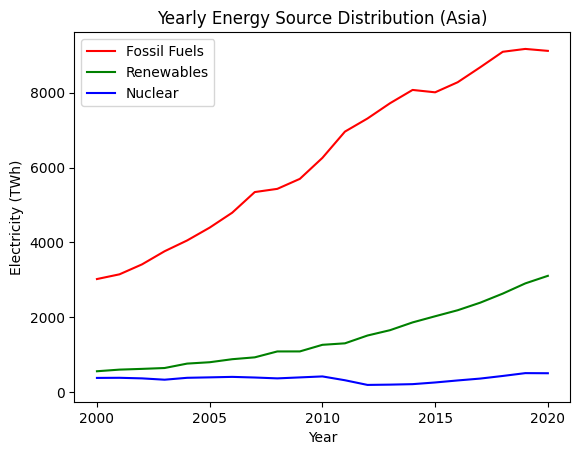

In [ ]:
#Data Viz of Asia
plt.plot(list(range(2000, 2021)), asia_data_sum_by_year["Electricity from fossil fuels (TWh)"],  label="Fossil Fuels", color="red")
plt.plot(list(range(2000, 2021)), asia_data_sum_by_year["Electricity from renewables (TWh)"], label="Renewables", color="green")
plt.plot(list(range(2000, 2021)), asia_data_sum_by_year["Electricity from nuclear (TWh)"], label="Nuclear", color="blue")

plt.xlabel("Year")
plt.ylabel("Electricity (TWh)")
plt.title("Yearly Energy Source Distribution (Asia)")
plt.xticks(list(range(2000, 2021,5)))
plt.legend()
plt.show()

#### SEA

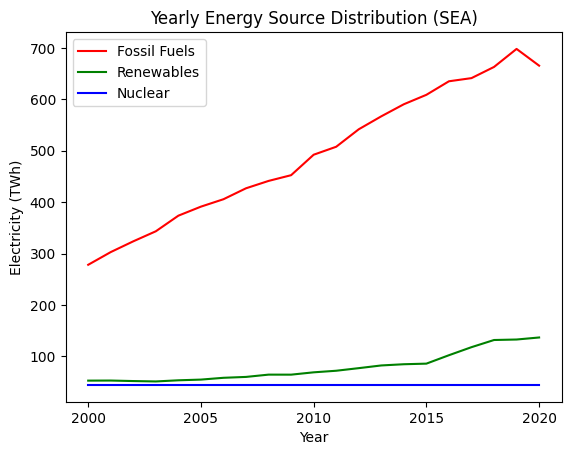

In [ ]:
#Data Viz of SEA
plt.plot(list(range(2000, 2021)), sea_data_sum_by_year["Electricity from fossil fuels (TWh)"],  label="Fossil Fuels", color="red")
plt.plot(list(range(2000, 2021)), sea_data_sum_by_year["Electricity from renewables (TWh)"], label="Renewables", color="green")
plt.plot(list(range(2000, 2021)), sea_data_sum_by_year["Electricity from nuclear (TWh)"], label="Nuclear", color="blue")

plt.xlabel("Year")
plt.ylabel("Electricity (TWh)")
plt.title("Yearly Energy Source Distribution (SEA)")
plt.xticks(list(range(2000, 2021,5)))
plt.legend()
plt.show()

#### Philippines

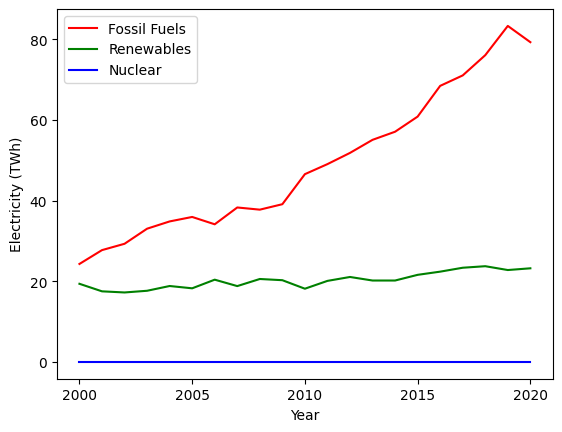

In [ ]:
#Data Viz of PH
plt.plot(list(range(2000, 2021)), ph_data_sum_by_year["Electricity from fossil fuels (TWh)"],  label="Fossil Fuels", color="red")
plt.plot(list(range(2000, 2021)), ph_data_sum_by_year["Electricity from renewables (TWh)"], label="Renewables", color="green")
plt.plot(list(range(2000, 2021)), ph_data_sum_by_year["Electricity from nuclear (TWh)"], label="Nuclear", color="blue")

plt.xlabel("Year")
plt.ylabel("Electricity (TWh)")

plt.xticks(list(range(2000, 2021,5)))
plt.legend()
plt.show()

Time series data visualization of all three groups shows that energy sources from fossil fuels and renewable are increasing every year while nuclear remains stationary.

###Forecasting Energy Distribution using a Linear Regression Model

The model to be used to forecast the energy generated in the next decade or two is the linear regression model. The library for the model is taken from sci-kit learn.

#### Asia

In [ ]:
# Generate Linear Regression Model for Fossil Fuels, Renewables, Nuclear
asia_fossil_model = LinearRegression().fit(data_years, asia_data_sum_by_year['Electricity from fossil fuels (TWh)'])
asia_renewable_model = LinearRegression().fit(data_years, asia_data_sum_by_year['Electricity from renewables (TWh)'])
asia_nuclear_model = LinearRegression().fit(data_years, asia_data_sum_by_year['Electricity from nuclear (TWh)'])

In [ ]:
# Use Generated Model to Predict Values from 2000 to 2040
reg_years = np.array(list(range(2000, 2041))).reshape((-1, 1))
asia_fossil_pred = asia_fossil_model.predict(reg_years)
asia_renewable_pred = asia_renewable_model.predict(reg_years)
asia_nuclear_pred = asia_nuclear_model.predict(reg_years)

In [ ]:
#Calculate Mean Average Percentage Error
asia_fossil_mape = mean_absolute_percentage_error(asia_data_sum_by_year['Electricity from fossil fuels (TWh)'], asia_fossil_pred[:21])
asia_renewable_mape = mean_absolute_percentage_error(asia_data_sum_by_year['Electricity from renewables (TWh)'], asia_renewable_pred[:21])
asia_nuclear_mape = mean_absolute_percentage_error(asia_data_sum_by_year['Electricity from nuclear (TWh)'], asia_nuclear_pred[:21])
print("MAPE of Asia Electricity from fossil fuels model:", asia_fossil_mape)
print("MAPE of Asia Electricity from renewables model:", asia_renewable_mape)
print("MAPE of Asia Electricity from nuclear model:", asia_nuclear_mape)

MAPE of Asia Electricity from fossil fuels model: 0.030259104032843504
MAPE of Asia Electricity from renewables model: 0.15020764356693114
MAPE of Asia Electricity from nuclear model: 0.21754292864483527


The fossil fuel model provides a low error, while the renewables model provides an intermediate amount of error. The same goes for the nuclear model

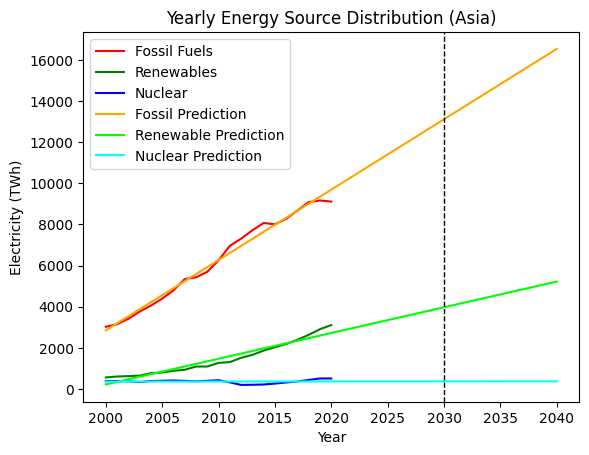

In [ ]:
#Create Plot of Asia Forecasting
asia_forecast_fig = plt.figure()
plt.plot(list(range(2000, 2021)), asia_data_sum_by_year["Electricity from fossil fuels (TWh)"],  label="Fossil Fuels", color="red")
plt.plot(list(range(2000, 2021)), asia_data_sum_by_year["Electricity from renewables (TWh)"], label="Renewables", color="green")
plt.plot(list(range(2000, 2021)), asia_data_sum_by_year["Electricity from nuclear (TWh)"], label="Nuclear", color="blue")
plt.plot(list(range(2000, 2041)), asia_fossil_pred, label="Fossil Prediction", color="orange")
plt.plot(list(range(2000, 2041)), asia_renewable_pred, label="Renewable Prediction", color="lime")
plt.plot(list(range(2000, 2041)), asia_nuclear_pred, label="Nuclear Prediction", color="cyan")
plt.axvline(x=2030, color='black', linestyle='--', linewidth=1)
plt.xlabel("Year")
plt.ylabel("Electricity (TWh)")
plt.title("Yearly Energy Source Distribution (Asia)")
plt.xticks(list(range(2000, 2041,5)))
plt.legend()
plt.show()

Figure above provides sufficient evidence that the energy production in fossil fuels and renewables will continue to climb, but the renewables would climb a lot slower in asia. Then, nuclear energy may not climb at all. Lastly, there may never be a year where renewable energy will be produced more than fossil fuels.

#### SEA

In [ ]:
sea_fossil_model = LinearRegression().fit(data_years, sea_data_sum_by_year['Electricity from fossil fuels (TWh)'])
sea_renewable_model = LinearRegression().fit(data_years, sea_data_sum_by_year['Electricity from renewables (TWh)'])
sea_nuclear_model = LinearRegression().fit(data_years, sea_data_sum_by_year['Electricity from nuclear (TWh)'])

In [ ]:
sea_fossil_pred = sea_fossil_model.predict(reg_years)
sea_renewable_pred = sea_renewable_model.predict(reg_years)
sea_nuclear_pred = sea_nuclear_model.predict(reg_years)

In [ ]:
#Calculate Mean Average Percentage Error
sea_fossil_mape = mean_absolute_percentage_error(sea_data_sum_by_year['Electricity from fossil fuels (TWh)'], sea_fossil_pred[:21])
sea_renewable_mape = mean_absolute_percentage_error(sea_data_sum_by_year['Electricity from renewables (TWh)'], sea_renewable_pred[:21])
sea_nuclear_mape = mean_absolute_percentage_error(sea_data_sum_by_year['Electricity from nuclear (TWh)'], sea_nuclear_pred[:21])
print("MAPE of SEA Electricity from fossil fuels model:", sea_fossil_mape)
print("MAPE of SEA Electricity from renewables model:", sea_renewable_mape)
print("MAPE of SEA Electricity from nuclear model:", sea_nuclear_mape)

MAPE of SEA Electricity from fossil fuels model: 0.014865210540310864
MAPE of SEA Electricity from renewables model: 0.12023429897538214
MAPE of SEA Electricity from nuclear model: 0.0


The fossil fuel model provides a low error, while the renewables model provides an intermediate amount of error. The nuclear model shows almost no error.

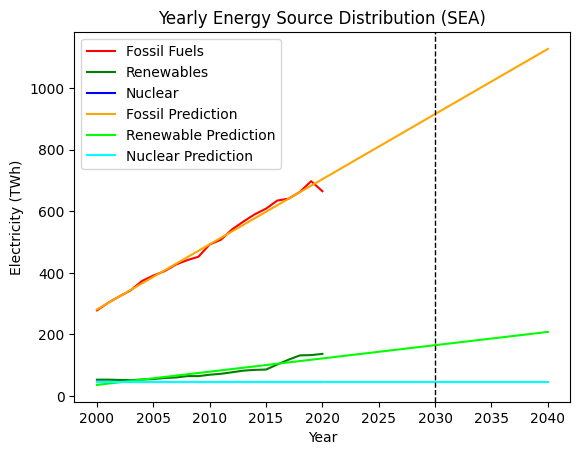

In [ ]:
#Create plot of SEA forecasting
plt.plot(list(range(2000, 2021)), sea_data_sum_by_year["Electricity from fossil fuels (TWh)"],  label="Fossil Fuels", color="red")
plt.plot(list(range(2000, 2021)), sea_data_sum_by_year["Electricity from renewables (TWh)"], label="Renewables", color="green")
plt.plot(list(range(2000, 2021)), sea_data_sum_by_year["Electricity from nuclear (TWh)"], label="Nuclear", color="blue")
plt.plot(list(range(2000, 2041)), sea_fossil_pred, label="Fossil Prediction", color="orange")
plt.plot(list(range(2000, 2041)), sea_renewable_pred, label="Renewable Prediction", color="lime")
plt.plot(list(range(2000, 2041)), sea_nuclear_pred, label="Nuclear Prediction", color="cyan")
plt.axvline(x=2030, color='black', linestyle='--', linewidth=1)
plt.xlabel("Year")
plt.ylabel("Electricity (TWh)")
plt.title("Yearly Energy Source Distribution (SEA)")
plt.xticks(list(range(2000, 2041,5)))
plt.legend()
plt.show()

Figure above provides sufficient evidence that the energy production in fossil fuels and renewables will continue to climb, but the renewables would climb a lot slower in asia. Then, nuclear energy may not climb at all. Lastly, there may never be a year where renewable energy will be produced more than fossil fuels.

#### Philippines

In [ ]:
ph_fossil_model = LinearRegression().fit(data_years, ph_data_sum_by_year['Electricity from fossil fuels (TWh)'])
ph_renewable_model = LinearRegression().fit(data_years, ph_data_sum_by_year['Electricity from renewables (TWh)'])
ph_nuclear_model = LinearRegression().fit(data_years, ph_data_sum_by_year['Electricity from nuclear (TWh)'])

In [ ]:
ph_fossil_pred = ph_fossil_model.predict(reg_years)
ph_renewable_pred = ph_renewable_model.predict(reg_years)
ph_nuclear_pred = ph_nuclear_model.predict(reg_years)

In [ ]:
#Calculate Mean Average Percentage Error
ph_fossil_mape = mean_absolute_percentage_error(ph_data_sum_by_year['Electricity from fossil fuels (TWh)'], ph_fossil_pred[:21])
ph_renewable_mape = mean_absolute_percentage_error(ph_data_sum_by_year['Electricity from renewables (TWh)'], ph_renewable_pred[:21])
ph_nuclear_mape = mean_absolute_percentage_error(ph_data_sum_by_year['Electricity from nuclear (TWh)'], ph_nuclear_pred[:21])
print("MAPE of PH Electricity from fossil fuels model:", ph_fossil_mape)
print("MAPE of PH Electricity from renewables model:", ph_renewable_mape)
print("MAPE of PH Electricity from nuclear model:", ph_nuclear_mape)

MAPE of PH Electricity from fossil fuels model: 0.08055440345150681
MAPE of PH Electricity from renewables model: 0.03671852163752797
MAPE of PH Electricity from nuclear model: 0.0


The fossil fuel model provides a low error, and the same goes for the renewables model. The nuclear model shows almost no error.

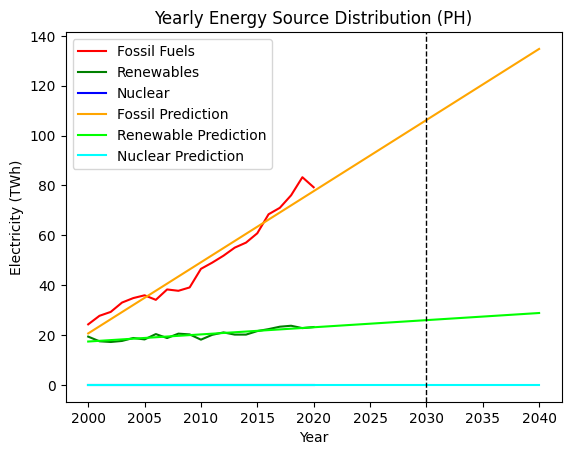

In [ ]:
# create line plot of energy data
plt.plot(list(range(2000, 2021)), ph_data_sum_by_year["Electricity from fossil fuels (TWh)"],  label="Fossil Fuels", color="red")
plt.plot(list(range(2000, 2021)), ph_data_sum_by_year["Electricity from renewables (TWh)"], label="Renewables", color="green")
plt.plot(list(range(2000, 2021)), ph_data_sum_by_year["Electricity from nuclear (TWh)"], label="Nuclear", color="blue")
plt.plot(list(range(2000, 2041)), ph_fossil_pred, label="Fossil Prediction", color="orange")
plt.plot(list(range(2000, 2041)), ph_renewable_pred, label="Renewable Prediction", color="lime")
plt.plot(list(range(2000, 2041)), ph_nuclear_pred, label="Nuclear Prediction", color="cyan")
plt.axvline(x=2030, color='black', linestyle='--', linewidth=1)
plt.xlabel("Year")
plt.ylabel("Electricity (TWh)")
plt.title("Yearly Energy Source Distribution (PH)")
plt.xticks(list(range(2000, 2041,5)))
plt.legend()
plt.show()

Figure above provides sufficient evidence that the energy production in fossil fuels and renewables will continue to climb, but the renewables would climb a lot slower in asia. Then, nuclear energy may not climb at all. Lastly, there may never be a year where renewable energy will be produced more than fossil fuels.

In [ ]:
target_years = np.array([2030,2040]).reshape((-1, 1))
asia_fossil_target_pred = asia_fossil_model.predict(target_years)
asia_renewable_target_pred = asia_renewable_model.predict(target_years)
asia_nuclear_target_pred = asia_nuclear_model.predict(target_years)
sea_fossil_target_pred = sea_fossil_model.predict(target_years)
sea_renewable_target_pred = sea_renewable_model.predict(target_years)
sea_nuclear_target_pred = sea_nuclear_model.predict(target_years)
ph_fossil_target_pred = ph_fossil_model.predict(target_years)
ph_renewable_target_pred = ph_renewable_model.predict(target_years)
ph_nuclear_target_pred = ph_nuclear_model.predict(target_years)

In [ ]:
asia_2030_pred = asia_renewable_target_pred[0]/(asia_fossil_target_pred[0] + asia_renewable_target_pred[0] + asia_nuclear_target_pred[0])*100
sea_2030_pred = sea_renewable_target_pred[0]/(sea_fossil_target_pred[0] + sea_renewable_target_pred[0] + sea_nuclear_target_pred[0])*100
ph_2030_pred = ph_renewable_target_pred[0]/(ph_fossil_target_pred[0] + ph_renewable_target_pred[0] + ph_nuclear_target_pred[0])*100
print("PERCENT SHARE OF RENEWABLES BY 2030")
print("Asian % Renewable 2030:",asia_2030_pred)
print("SEA % Renewable 2030:",sea_2030_pred)
print("PH % Renewable 2030:",ph_2030_pred)

PERCENT SHARE OF RENEWABLES BY 2030
Asian % Renewable 2030: 22.756511802912087
SEA % Renewable 2030: 14.66847020723921
PH % Renewable 2030: 19.651133017119996


Withour further intervention, the percent share of renewables will not reach the 35% goal by 2030.

In [ ]:
asia_2040_pred = asia_renewable_target_pred[1]/(asia_fossil_target_pred[1] + asia_renewable_target_pred[1] + asia_nuclear_target_pred[1])*100
sea_2040_pred = sea_renewable_target_pred[1]/(sea_fossil_target_pred[1] + sea_renewable_target_pred[1] + sea_nuclear_target_pred[1])*100
ph_2040_pred = ph_renewable_target_pred[1]/(ph_fossil_target_pred[1] + ph_renewable_target_pred[1] + ph_nuclear_target_pred[1])*100
print("PERCENT SHARE OF RENEWABLES BY 2040")
print("Asian % Renewable 2040:",asia_2040_pred)
print("SEA % Renewable 2040:",sea_2040_pred)
print("PH % Renewable 2040:",ph_2040_pred)

PERCENT SHARE OF RENEWABLES BY 2040
Asian % Renewable 2040: 23.60116622882217
SEA % Renewable 2040: 15.080922905782371
PH % Renewable 2040: 17.629083376576457


Withour further intervention, the percent share of renewables will not reach the 50% by 2040. In fact, it is predicted that Asia as a whole would only improve by a percent from 2030 to 2040. While SEA and Philippines, respectively would have decreased renewable share due to fossil fuels massively outpacing renewables

#Summary of Findings

The data presented in the figures paint a nuanced picture of the energy landscape, indicating a dual rise in fossil fuel and renewable energy production. The upward trend in energy production is a global phenomenon, but the pace and distribution of this growth vary across regions. While both fossil fuels and renewables are on the ascent, the figure underscores that the ascent for renewables, particularly in Asia, is considerably slower.
By 2030, Asia is projected to have a renewable energy share of 23.88%, with Southeast Asia (SEA) and the Philippines lagging behind at 0.54% and 6.33%, respectively. These figures hint at a regional disparity in the adoption and integration of renewable energy sources, with certain areas facing greater challenges or slower transitions than others.
A notable concern emerges when considering the trajectory beyond 2030. The absence of significant intervention is predicted to impede the renewables' progress, with the overall share falling short of the 50% mark by 2040. Furthermore, the data suggests a mere one percent improvement in Asia's renewable energy share from 2030 to 2040, indicating a sluggish pace of transition.
The most striking revelation is the foreseen decline in the renewable share for SEA and the Philippines. Despite initial gains, these regions are anticipated to experience a reduction in renewable energy usage, primarily due to the overwhelming dominance of fossil fuels. Fossil fuels are expected to outpace renewables, leading to a diminished share of sustainable energy sources in these areas.
In light of these projections, it becomes apparent that the energy transition towards renewables faces formidable challenges, particularly in certain regions. The data highlights the urgent need for strategic interventions and policy measures to accelerate the adoption of renewable energy sources, ensuring a more sustainable and balanced energy future. Without such measures, the envisioned scenario suggests a persistent reliance on fossil fuels, with renewable energy struggling to surpass its conventional counterpart in the coming years.


#Recommendations

Transitioning to renewable energy requires a multi-step process that comprehensively covers demographics, psychographics, and socioeconomic status. Through a four-pronged approach that addresses each of the critical areas of concern in the energy transition process, each prong is interconnected and can reinforce the other mutually.

1.	Optimizing Land Use:
As renewable energy solutions take up large areas, steps must be taken to optimize the limited land area on earth, considering strategies to maximize land use (Sylvia, 2020).  For every country, pre-implementation and installation, a comprehensive assessment of the available land resources should be conducted. Land use for multiple purposes, such as agri-solar systems and solar panels on agricultural land, should be considered. Additionally, to entice entrepreneurship and innovation, governmental or institutional policies should be implemented to reward parties working toward efficient land utilization and novel ways to maximize verticality and horizontality (Ream, 2015). Lastly, by introducing partnerships between the government and the private sector, further research grants could be provided to develop alternative energy sources and their ability to maximize land area (Worringham, 2021).

2.	Reducing Overall Costs
As a primary consideration for electricity sourcing and consumption, costs for alternative energy should be reduced, and this is achievable by investing in research and development to improve their efficiency per peso of investment (International Trade Administration, 2021). Governments can implement policies that provide financial incentives for using clean or renewable energy, such as tax credits or subsidies for its production and subsequent consumption, helping make the transition to renewable energy more affordable (Department of Energy Philippines, 2021). In the Philippines, the Electric Vehicle Industry Development Act was passed into law on April 15, 2022, a significant step in governmental change to shift towards greener mobility and a fossil fuel-free environment, motivating car owners to purchase cleaner, more efficient vehicles through an implemented incentive system (Department of Energy Philippines, 2022). With a policy framework that attracts investors to renewable energy technology and value proposition in solving the overarching global warming and emission reduction problem, the government can further perform research and development to develop the existing technologies.

3.	Diversify the Energy Mix
The third prong of the solution is the diversification of the energy mix to ensure consistency of the energy supplied to its users. Using a combination of different renewable energy sources, including solar, wind, hydro, and geothermal energy, the limitations of these energy sources can be mitigated individually, and it becomes possible to ensure a stable and reliable supply of energy (Akrofi, 2021). By varying the sources, suppliers, and transportation routes, countries can reduce the dependence on a single resource, diminishing the threat of energy scarcity and minimizing environmental impact (Ream, 2015).

4.	Improving Energy Storage
The fourth and final prong is an investment in advancing energy storage technologies, particularly in increasing their efficiency and durability. Numerous systematic approaches can be implemented. One strategy is cross-industry integration of technology and expertise, which can widen the scope of possible solutions. An example is recycling Electric Vehicle batteries in a power grid structure (Ahemd, 2022). Another approach is shifting to more sustainable and low-impact materials for storage systems. This decreases both the cost of producing batteries and the environmental impact. For instance, the introduction of lithium-ion batteries has been found to have been a viable alternative to conventional materials like nickel and cobalt. Currently, the cost of using new materials is relatively high; however, continued investment into research and development would allow increased production and, as an effect, would decrease the price (Iberdrola, 2021).


#References



Renewable Power on Course to Shatter More Records as Countries around the World Speed up Deployment - News. (2023, June 1). IEA. https://www.iea.org/news/renewable-power-on-course-to-shatter-more-records-as-countries-around-the-world-speed-up-deployment

Ritchie, H., Roser, M., & Rosado, P. (2023). Renewable Energy. Our World in Data. https://ourworldindata.org/renewable-energy

Shaftel, H. (n.d.). What Is Climate Change? Climate Change: Vital Signs of the Planet. Retrieved November 22, 2023, from https://climate.nasa.gov/what-is-climate-change

Sustainable Development Goals. (n.d.). UNDP. Retrieved December 11, 2023, from https://www.undp.org/sustainable-development-goals

Sweeney, C., Bessa, R. J., Browell, J., & Pinson, P. (2019). The future of forecasting for renewable energy. ¬¬WIREs Energy and Environment, 9(2). https://doi.org/10.1002/wene.365

Ritchie, H., Roser, M., & Rosado, P. (2023). Renewable Energy. Our World in Data. https://ourworldindata.org/renewable-energy

Shaftel, H. (n.d.). What Is Climate Change? Climate Change: Vital Signs of the Planet. Retrieved November 22, 2023, from https://climate.nasa.gov/what-is-climate-change

Sustainable Development Goals. (n.d.). UNDP. Retrieved December 11, 2023, from https://www.undp.org/sustainable-development-goals

Sylvia, T. (2020, February 14). Recognizing and solving challenges in renewable energy land usage. PV Magazine. Retrieved November 22, 2023, from https://pv-magazine-usa.com/2020/02/14/

recognizing-and-solving-challenges-in-renewable-energy-land-usage/
Ream, M.-K. (2015).When it comes to energy, countries should mix it up. SHAREAMERICA. Retrieved November 22, 2023, from https://share.america.gov/diversifying-energy-sources-boosts-security/

Worringham, C. (n.d.). IEEFA: Reducing land-use impacts of renewable generation could smooth the path for India’s energy transition. Institute for Energy Economics and Financial Analysis. Retrieved November 22, 2023, from https://ieefa.org/articles/ieefa-reducing-land-use-impacts-renewable-generation-could-smooth-path-indias-energy

International Trade Administration. (n.d.). Energy Resource Guide - Philippines - Renewable energy. Trade.gov. Retrieved from https://www.trade.gov/energy-resource-guide-philippines-renewable-energy

Department of Energy Philippines. (n.d.). National Renewable Energy Program. Retrieved from https://www.doe.gov.ph/national-renewable-energy-program

Melville, T. (2022, May 16). Energy storage important to creating affordable, reliable, deeply decarbonized electricity systems. MIT News | Massachusetts Institute of Technology. Retrieved from https://news.mit.edu/2022/energy-storage-important-creating-affordable-reliable-deeply-decarbonized-electricity-systems-0516

Department of Energy Philippines. (2022, August 12). IMPLEMENTING RULES AND REGULATIONS OF REPUBLIC ACT NO. 11697 OF THE ELECTRIC VEHICLE INDUSTRY DEVELOPMENT ACT. Retrieved from https://www.doe.gov.ph/sites/default/files/pdf/announcements/DOE%20DOTR%20IRR%20EVIDA%2008212022.pdf?withshield=1

Akrofi, M. M. (2021). Correction to: An analysis of energy diversifcation and transition trends in Africa. International Journal of Energy and Water Resources. https://doi.org/10.1007/s42108-020-00107-z

Ahemd, D. (2022, October 5). 3 ways to make energy storage more innovative and sustainable. World Economic Forum. Retrieved from https://www.weforum.org/agenda/2022/09/3-ways-energy-storage-sustainable/

Iberdrola. (2021, April 22). ENERGY STORAGE. Retrieved from https://www.iberdrola.com/sustainability/efficient-energy-storage
